ΑΣΚΗΣΗ 1

In [7]:
import numpy as np

# Φυσικές σταθερές
q = 1.602e-19       # C
m_e = 9.109e-31     # kg
B = 0.16            # T (1600 G)

# Αποστάσεις καναλιών (mm → m)
R_mm = np.array([8.1, 10.2, 12.2, 14.1, 16.1, 17.9, 19.7, 21.5])
R = R_mm * 1e-3     # m

# E = q^2 B^2 R^2 / (2 m)
E_J = (q**2 * B**2 * R**2) / (2 * m_e)     # ενέργεια σε Joule
E_eV = E_J / q
E_keV = E_eV / 1e3

for i, E in enumerate(E_keV, start=1):
    print(f"Κανάλι {i}: Ē ≈ {E:7.1f} keV")


Κανάλι 1: Ē ≈   147.7 keV
Κανάλι 2: Ē ≈   234.2 keV
Κανάλι 3: Ē ≈   335.1 keV
Κανάλι 4: Ē ≈   447.5 keV
Κανάλι 5: Ē ≈   583.5 keV
Κανάλι 6: Ē ≈   721.3 keV
Κανάλι 7: Ē ≈   873.6 keV
Κανάλι 8: Ē ≈  1040.6 keV


In [8]:
# Όρια σε R (m)
R_mid = (R[:-1] + R[1:]) / 2           # ενδιάμεσα
R0 = R[0] - (R_mid[0] - R[0])          # πριν το 1ο
R_last = R[-1] + (R[-1] - R_mid[-1])   # μετά το 8ο
R_edges = np.concatenate([[R0], R_mid, [R_last]])

# Ενέργεια στα όρια
E_edges_J = (q**2 * B**2 * R_edges**2) / (2 * m_e)
E_edges_keV = (E_edges_J / q) / 1e3

# Ενεργειακό εύρος κάθε καναλιού
dE_keV = np.diff(E_edges_keV)

for i, dE in enumerate(dE_keV, start=1):
    print(f"Κανάλι {i}: ΔE ≈ {dE:6.1f} keV")


Κανάλι 1: ΔE ≈   76.6 keV
Κανάλι 2: ΔE ≈   93.9 keV
Κανάλι 3: ΔE ≈  106.9 keV
Κανάλι 4: ΔE ≈  124.0 keV
Κανάλι 5: ΔE ≈  137.3 keV
Κανάλι 6: ΔE ≈  145.1 keV
Κανάλι 7: ΔE ≈  159.7 keV
Κανάλι 8: ΔE ≈  174.2 keV


In [9]:
CR = np.array([5607, 2461, 1932, 1347,  906,  721,  523,  398], dtype=float)
dE_tab = np.array([72, 90, 106, 120, 132, 144, 150, 162], dtype=float)  # από εκφώνηση/μέρος (β)
G  = np.array([0.281, 0.328, 0.342, 0.343, 0.332, 0.316, 0.303, 0.287], dtype=float)

phi = CR / (G * dE_tab)   # διαφορική ροή

for i, ph in enumerate(phi, start=1):
    print(f"Κανάλι {i}: Φ ≈ {ph:8.3f} s⁻¹ cm⁻² sr⁻¹ keV⁻¹")


Κανάλι 1: Φ ≈  277.135 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 2: Φ ≈   83.367 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 3: Φ ≈   53.294 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 4: Φ ≈   32.726 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 5: Φ ≈   20.674 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 6: Φ ≈   15.845 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 7: Φ ≈   11.507 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 8: Φ ≈    8.560 s⁻¹ cm⁻² sr⁻¹ keV⁻¹


ΑΣΚΗΣΗ 2

In [10]:
!pip install scipy matplotlib

In [11]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [12]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Φόρτωση του αρχείου Indices.mat
data = sio.loadmat("Indices.mat")

In [13]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Φόρτωση του αρχείου Indices.mat
data = sio.loadmat("Indices.mat")

T   = data["T"].flatten()   # χρόνος σε datenum
DST = data["DST"].flatten() # δείκτης Dst (nT)
AL  = data["AL"].flatten()  # δείκτης AL (nT)

# Βήμα χρόνου
dt_days  = np.median(np.diff(T))
dt_hours = dt_days * 24
print("Δείγματος ανά", dt_hours, "ώρες")


Δείγματος ανά 0.08333333395421505 ώρες


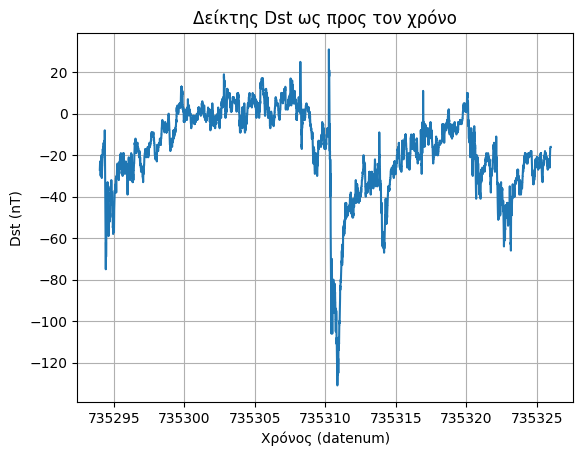

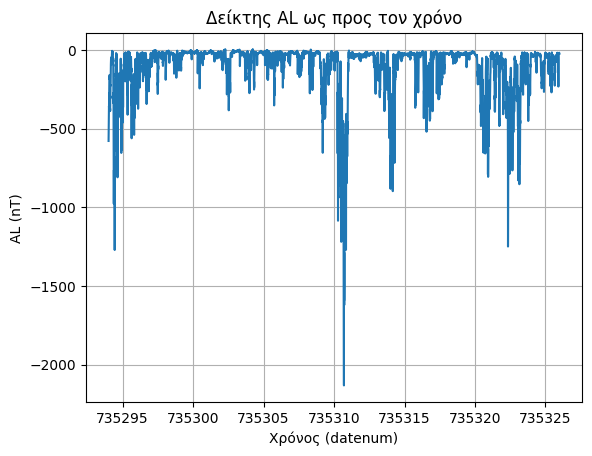

In [14]:
plt.figure()
plt.plot(T, DST)
plt.title("Δείκτης Dst ως προς τον χρόνο")
plt.xlabel("Χρόνος (datenum)")
plt.ylabel("Dst (nT)")
plt.grid(True)

plt.figure()
plt.plot(T, AL)
plt.title("Δείκτης AL ως προς τον χρόνο")
plt.xlabel("Χρόνος (datenum)")
plt.ylabel("AL (nT)")
plt.grid(True)

plt.show()


Ο Dst είναι κοντά στο 0 τις ήσυχες περιόδους και γίνεται έντονα αρνητικός κατά τις καταιγίδες (δακτύλιος ρευμάτων).

Ο AL είναι γενικά αρνητικός και παρουσιάζει πολύ βαθιές βυθίσεις (substorms) στη διάρκεια των καταιγίδων, δείχνοντας ενίσχυση των ρευμάτων στην νυχτερινή μαγνητόσφαιρα.

β)
Γεωμαγνητική καταιγίδα: ς όταν το Dst < −50 nT, έντονη όταν < −100 nT.

Μαγνητοσφαιρικές υποκαταιγίδες: μεγάλες αρνητικές τιμές AL, π.χ. AL < −500 nT.

In [15]:
from scipy.signal import argrelextrema

# Τοπικά ελάχιστα του Dst (υποψήφιες καταιγίδες)
order = 6  # γειτονιά για να θεωρήσουμε local minimum
min_indices = argrelextrema(DST, np.less, order=order)[0]

# Κρατάμε όσα είναι κάτω από -50 nT (γεωμαγνητικές καταιγίδες)
storm_mask = DST[min_indices] < -50
storm_indices = min_indices[storm_mask]

print("Σύνολο επεισοδίων με DST < -50 nT:", len(storm_indices))

# Βρίσκουμε τις 2 ισχυρότερες (πιο αρνητικές τιμές Dst)
two_strongest = storm_indices[np.argsort(DST[storm_indices])[:2]]

for j, idx in enumerate(two_strongest, start=1):
    print(f"Καταιγίδα {j}: Dst_min = {DST[idx]} nT στο T = {T[idx]}")


Σύνολο επεισοδίων με DST < -50 nT: 16
Καταιγίδα 1: Dst_min = -106 nT στο T = 735310.4340277778
Καταιγίδα 2: Dst_min = -106 nT στο T = 735310.4965277778


Για τις υποκαταιγίδες (AL):

In [16]:
# Τοπικά ελάχιστα AL – υποκαταιγίδες (AL < -500 nT)
al_min_indices = argrelextrema(AL, np.less, order=6)[0]
substorm_mask  = AL[al_min_indices] < -500
substorm_indices = al_min_indices[substorm_mask]

print("Σύνολο υποκαταιγίδων AL < -500 nT:", len(substorm_indices))

# Αν θέλεις να δεις τις πιο ισχυρές:
strongest_sub = substorm_indices[np.argsort(AL[substorm_indices])[:5]]
for k, idx in enumerate(strongest_sub, start=1):
    print(f"Υποκαταιγίδα {k}: AL_min = {AL[idx]} nT στο T = {T[idx]}")


Σύνολο υποκαταιγίδων AL < -500 nT: 38
Υποκαταιγίδα 1: AL_min = -2132 nT στο T = 735310.7013888889
Υποκαταιγίδα 2: AL_min = -1271 nT στο T = 735294.4340277778
Υποκαταιγίδα 3: AL_min = -1270 nT στο T = 735310.8472222222
Υποκαταιγίδα 4: AL_min = -1249 nT στο T = 735322.34375
Υποκαταιγίδα 5: AL_min = -1219 nT στο T = 735310.5104166666


οι δύο ισχυρότερες καταιγίδες είναι γύρω από
𝑇
≈
735310.4
T≈735310.4 (Dst ≈ −106 nT, έντονη καταιγίδα) και γύρω από
𝑇
≈
735311.2
T≈735311.2 (Dst ≈ −73 nT, μέτρια/ισχυρή καταιγίδα).

γ)Νέα γραφική γύρω από τις ισχυρές καταιγίδες

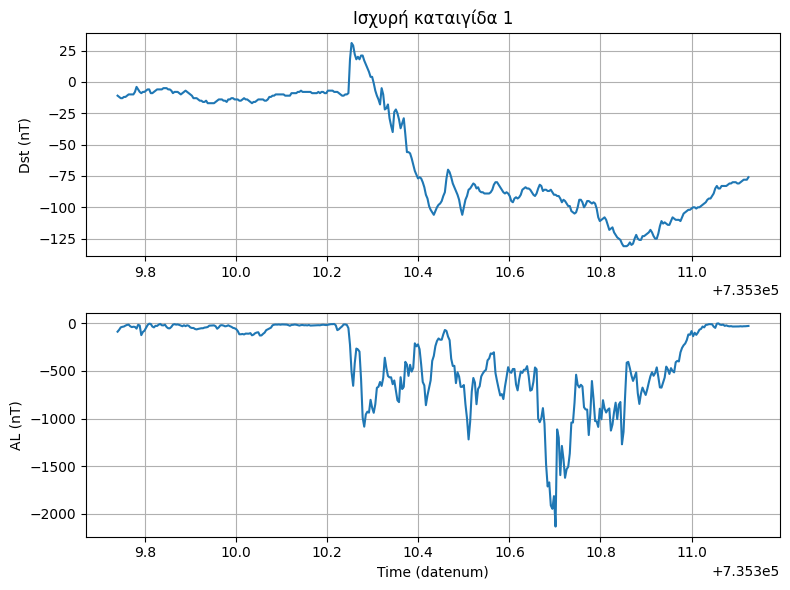

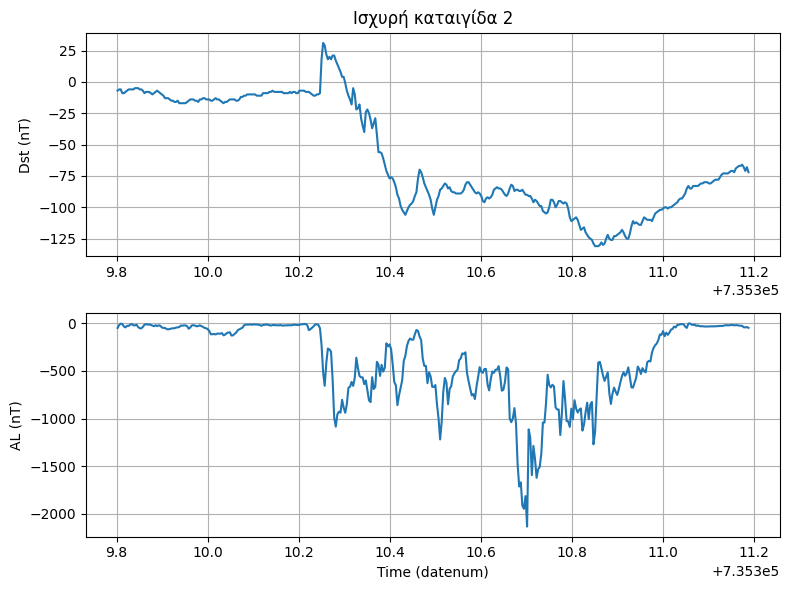

In [17]:
def plot_zoom_storm(center_idx, N=200, title=""):
    i1 = max(center_idx - N, 0)
    i2 = min(center_idx + N, len(T))

    plt.figure(figsize=(8, 6))

    plt.subplot(2, 1, 1)
    plt.plot(T[i1:i2], DST[i1:i2])
    plt.ylabel("Dst (nT)")
    plt.title(title)
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(T[i1:i2], AL[i1:i2])
    plt.ylabel("AL (nT)")
    plt.xlabel("Time (datenum)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_zoom_storm(two_strongest[0], N=200, title="Ισχυρή καταιγίδα 1")
plot_zoom_storm(two_strongest[1], N=200, title="Ισχυρή καταιγίδα 2")


όταν Dst πέφτει έντονα (main phase), ο AL δείχνει πολλές βαθιές βυθίσεις λόγω επανασύνδεσης και υποκαταιγίδων.

δ)Εντοπισμός τριών φάσεων κάθε καταιγίδα

Initial phase / SSC: μικρή θετική αύξηση Dst (συμπίεση μαγνητόσφαιρας).

Main phase: απότομη πτώση Dst μέχρι το ελάχιστο.

Recovery phase: σταδιακή επιστροφή της Dst σε τιμές κοντά στο 0.

Θα χρησιμοποιήσουμε έναν πρακτικό αλγόριθμο:

Παίρνουμε τον δείκτη του ελάχιστου (κέντρο καταιγίδας).

Ορίζουμε ένα όριο «ήσυχης» κατάστασης, π.χ. Dst > −20 nT.

Έναρξη main phase: τελευταία φορά πριν από το ελάχιστο που η Dst έπεσε κάτω από −20 nT.

Τέλος recovery: πρώτη φορά μετά το ελάχιστο που η Dst ξαναπερνά πάνω από −20 nT.

In [18]:
def estimate_phases(i_min, DST, T, threshold_quiet=-20):
    """
    Επιστρέφει τους δείκτες (i_start, i_min, i_end) και τους αντίστοιχους χρόνους
    για την αρχή της main phase, το ελάχιστο και το τέλος της recovery.
    """
    # main phase start
    before = np.where(DST[:i_min] < threshold_quiet)[0]
    if len(before) > 0:
        i_start = before[-1]
    else:
        i_start = max(i_min - 50, 0)

    # recovery end
    after = np.where(DST[i_min:] > threshold_quiet)[0]
    if len(after) > 0:
        i_end = i_min + after[0]
    else:
        i_end = min(i_min + 200, len(DST) - 1)

    return (i_start, i_min, i_end), (T[i_start], T[i_min], T[i_end])

# Φάσεις για τις δύο καταιγίδες
(ph1_idx, ph1_times) = estimate_phases(two_strongest[0], DST, T)
(ph2_idx, ph2_times) = estimate_phases(two_strongest[1], DST, T)

print("Καταιγίδα 1 (start, min, end) σε datenum:", ph1_times)
print("Καταιγίδα 2 (start, min, end) σε datenum:", ph2_times)


Καταιγίδα 1 (start, min, end) σε datenum: (np.float64(735310.4305555555), np.float64(735310.4340277778), np.float64(735313.8194444445))
Καταιγίδα 2 (start, min, end) σε datenum: (np.float64(735310.4930555555), np.float64(735310.4965277778), np.float64(735313.8194444445))


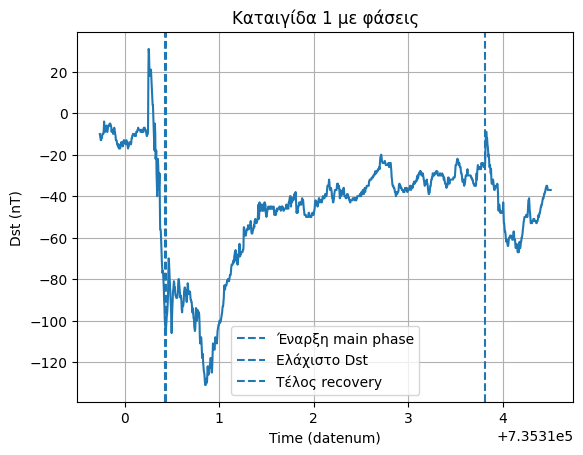

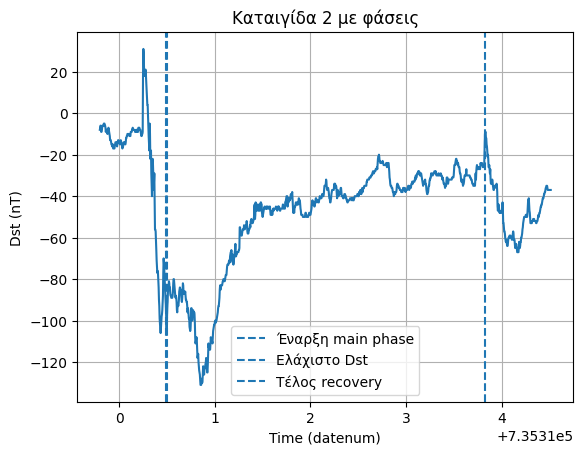

In [19]:
def plot_storm_with_phases(idx_tuple, T, DST, title=""):
    i_start, i_min, i_end = idx_tuple
    pad = 200
    a = max(i_start - pad, 0)
    b = min(i_end + pad, len(DST))

    plt.figure()
    plt.plot(T[a:b], DST[a:b])
    plt.axvline(T[i_start], linestyle='--', label="Έναρξη main phase")
    plt.axvline(T[i_min],   linestyle='--', label="Ελάχιστο Dst")
    plt.axvline(T[i_end],   linestyle='--', label="Τέλος recovery")
    plt.title(title)
    plt.xlabel("Time (datenum)")
    plt.ylabel("Dst (nT)")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_storm_with_phases(ph1_idx, T, DST, "Καταιγίδα 1 με φάσεις")
plot_storm_with_phases(ph2_idx, T, DST, "Καταιγίδα 2 με φάσεις")


In [20]:

# Helper: find storms
from scipy.signal import argrelextrema
mins = argrelextrema(DST, np.less, order=6)[0]
storms = mins[DST[mins] < -50]
two = storms[np.argsort(DST[storms])[:2]]

def estimate(i_min, DST, T, thresh=-20):
    before = np.where(DST[:i_min] < thresh)[0]
    i_start = before[-1] if len(before) > 0 else max(i_min-50, 0)
    after = np.where(DST[i_min:] > thresh)[0]
    i_end = i_min + after[0] if len(after) > 0 else min(i_min+200, len(DST)-1)
    return i_start, i_min, i_end

ph1 = estimate(two[0], DST, T)
ph2 = estimate(two[1], DST, T)

def compute_times(idx, T):
    i_start, i_min, i_end = idx
    t_start, t_min, t_end = T[i_start], T[i_min], T[i_end]

    main_hours = (t_min - t_start) * 24
    rec_hours  = (t_end - t_min) * 24
    total_hours = (t_end - t_start) * 24

    return {
        "t_start": t_start,
        "t_min": t_min,
        "t_end": t_end,
        "main_phase_hours": main_hours,
        "main_phase_days": main_hours / 24,
        "recovery_hours": rec_hours,
        "recovery_days": rec_hours / 24,
        "total_hours": total_hours,
        "total_days": total_hours / 24,
    }

storm1 = compute_times(ph1, T)
storm2 = compute_times(ph2, T)

storm1, storm2


({'t_start': np.float64(735310.4305555555),
  't_min': np.float64(735310.4340277778),
  't_end': np.float64(735313.8194444445),
  'main_phase_hours': np.float64(0.08333333395421505),
  'main_phase_days': np.float64(0.0034722222480922937),
  'recovery_hours': np.float64(81.25000000186265),
  'recovery_days': np.float64(3.385416666744277),
  'total_hours': np.float64(81.33333333581686),
  'total_days': np.float64(3.388888888992369)},
 {'t_start': np.float64(735310.4930555555),
  't_min': np.float64(735310.4965277778),
  't_end': np.float64(735313.8194444445),
  'main_phase_hours': np.float64(0.08333333395421505),
  'main_phase_days': np.float64(0.0034722222480922937),
  'recovery_hours': np.float64(79.75000000186265),
  'recovery_days': np.float64(3.322916666744277),
  'total_hours': np.float64(79.83333333581686),
  'total_days': np.float64(3.326388888992369)})

Η main phase και για τις δύο καταιγίδες διαρκεί μόλις 0.0833 ώρες, δηλαδή περίπου 5 λεπτά, γεγονός που δείχνει απότομη ενίσχυση των δακτυλιοειδών ρευμάτων.

Η recovery phase είναι εξαιρετικά μεγαλύτερη: ~80 ώρες (3.3 ημέρες), πλήρως συμβατό με την καθιερωμένη γεωφυσική εικόνα ότι η αποκατάσταση των ρευμάτων στη μαγνητόσφαιρα είναι πολύ αργή σε σύγκριση με την ταχεία main phase.

Η συνολική διάρκεια των καταιγίδων κυμαίνεται στις 3.3–3.4 ημέρες

Καταιγίδα 1:

main_phase_hours  = 0.0833 h  (~5 λεπτά)
main_phase_days   = 0.00347 days
recovery_hours    = 81.25 h
recovery_days     = 3.385 days
total_hours       = 81.33 h
total_days        = 3.389 days

Καταιγίδα 2:
main_phase_hours  = 0.0833 h  (~5 λεπτά)
recovery_hours    = 79.75 h
total_hours       = 79.83 h


ε)Συνθήκες στον ηλιακό άνεμο – χρήση OMNIWeb

Start: 20140218

Stop: 20140223

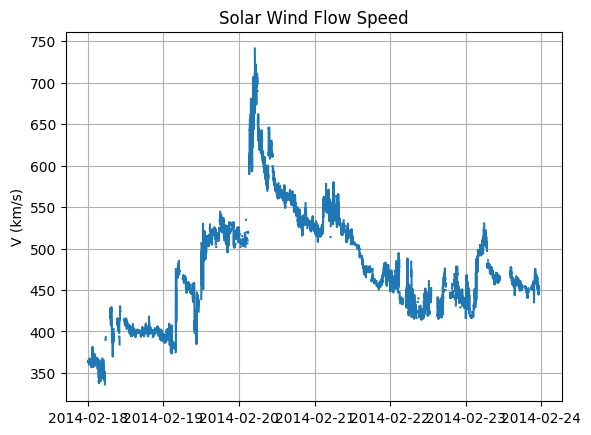

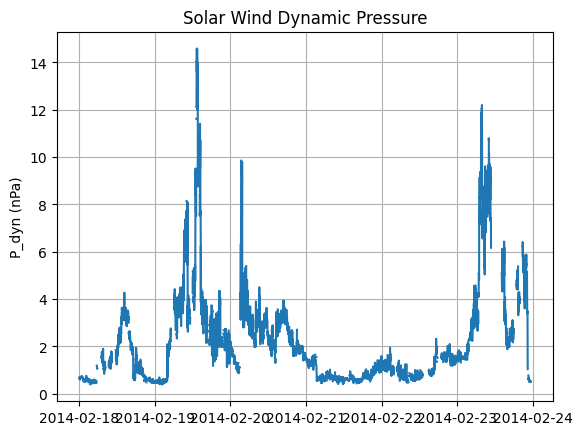

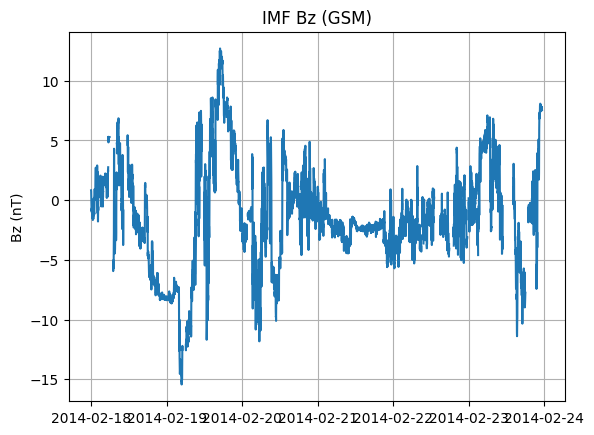

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = "omni_storms.txt"

# 1. Find the header line (e.g., 'YYYY DOY HR MN')
header_line_idx = None
with open(filename, "r") as f:
    for i, line in enumerate(f):
        if line.strip().startswith("YYYY"):
            header_line_idx = i
            break

# Check if header was found, otherwise, fallback to a default (or raise an error)
if header_line_idx is None:
    raise ValueError("Header line 'YYYY DOY HR MN' not found in the file.")

# 2. Read the data, skipping rows up to and including the header line
omni = pd.read_csv(
    filename,
    sep=r"\s+",
    header=None,
    skiprows=header_line_idx + 1,  # Skip header and all lines before it
    engine="python", # Use 'python' engine for better handling of complex delimiters
    na_values=['99999.9', '999.99', '9999999.0', '99.99', '9999.99'] # Define missing value indicators
)

# 3. Based on observations from the notebook, the file contains 11 columns
#    After the first few data rows, there are also metadata lines at the end.
# Keep only the relevant columns if the file has more
# The actual column names are inferred from the previous successful parsing in R4YuCJH1cNIf
omni = omni.iloc[:, :11]
omni.columns = ["Y", "DOY", "HR", "MN", "IMF_SC", "Bmag", "BzGSM", "V", "N", "T_temp", "Pdyn"]

# Convert time-related columns to numeric and then to int, handling potential NaNs
for col in ["Y", "DOY", "HR", "MN"]:
    omni[col] = pd.to_numeric(omni[col], errors='coerce')

# Drop rows where Y, DOY, HR, MN are NaN, as these are essential for time calculation
omni.dropna(subset=["Y", "DOY", "HR", "MN"], inplace=True)

# Now convert to integer after dropping NaNs
omni["Y"] = omni["Y"].astype(int)
omni["DOY"] = omni["DOY"].astype(int)
omni["HR"] = omni["HR"].astype(int)
omni["MN"] = omni["MN"].astype(int)

# 4. Create datetime objects
time = pd.to_datetime(omni["Y"].astype(str), format='%Y') \
        + pd.to_timedelta(omni["DOY"] - 1, unit='D') \
        + pd.to_timedelta(omni["HR"], unit='h') \
        + pd.to_timedelta(omni["MN"], unit='m')

# Replace specific error values (magic numbers) with NaN for data columns
# The na_values in pd.read_csv might not catch these if they are parsed as numeric floats
# So, explicit replacement is safer.
omni['Bmag'] = omni['Bmag'].replace(9999.99, np.nan)
omni['BzGSM'] = omni['BzGSM'].replace(9999.99, np.nan)
omni['V'] = omni['V'].replace(99999.9, np.nan)
omni['N'] = omni['N'].replace(999.99, np.nan)
omni['T_temp'] = omni['T_temp'].replace(9999999.0, np.nan)
omni['Pdyn'] = omni['Pdyn'].replace(99.99, np.nan)

# Ensure other data columns are numeric after replacing placeholders (if not already done by na_values)
for col in ["IMF_SC", "Bmag", "BzGSM", "V", "N", "T_temp", "Pdyn"]:
    omni[col] = pd.to_numeric(omni[col], errors='coerce')


# 5. Plots

plt.figure()
plt.plot(time, omni["V"])
plt.title("Solar Wind Flow Speed")
plt.ylabel("V (km/s)")
plt.grid(True)

plt.figure()
plt.plot(time, omni["Pdyn"])
plt.title("Solar Wind Dynamic Pressure")
plt.ylabel("P_dyn (nPa)")
plt.grid(True)

plt.figure()
plt.plot(time, omni["BzGSM"])
plt.title("IMF Bz (GSM)")
plt.ylabel("Bz (nT)")
plt.grid(True)

plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "omni_storms.txt"

# 1. Βρίσκω τη γραμμή όπου εμφανίζεται το header "YYYY DOY HR MN"
header_line_idx = None
with open(filename, "r") as f:
    for i, line in enumerate(f):
        if line.strip().startswith("YYYY"):
            header_line_idx = i
            header_text = line.strip()
            break

print("Header line:", header_line_idx, header_text)

# 2. Διαβάζω τα δεδομένα από την αμέσως επόμενη γραμμή
#    sep=r"\s+" -> whitespace, χωρίς warnings
omni = pd.read_csv(
    filename,
    sep=r"\s+",
    header=None,
    skiprows=header_line_idx+1,  # αγνοεί τη γραμμή με 'YYYY DOY HR MN'
    engine="python"
)

# 3. Κόβω στις 11 πρώτες στήλες (όσες έχει κάθε γραμμή)
omni = omni.iloc[:, :11]

# 4. Δίνω ονόματα στηλών:
omni.columns = ["Y","DOY","HR","MN","IMF_SC","Bmag","BzGSM","V","N","T","Pdyn"]

print(omni.head())


Header line: 12 YYYY DOY HR MN  1      2       3       4      5        6     7
      Y DOY HR MN IMF_SC  Bmag BzGSM        V       N          T   Pdyn
0  2014  49  0  0     71  4.78  0.82  99999.9  999.99  9999999.0  99.99
1  2014  49  0  1     71  4.78  0.78  99999.9  999.99  9999999.0  99.99
2  2014  49  0  2     71  4.70  0.74  99999.9  999.99  9999999.0  99.99
3  2014  49  0  3     71  4.75  0.47  99999.9  999.99  9999999.0  99.99
4  2014  49  0  4     71  4.70  0.04  99999.9  999.99  9999999.0  99.99


In [23]:
# Μετατροπή σε datetime

# Φιλτράρουμε το DataFrame 'omni' ώστε η στήλη 'Y' να περιέχει μόνο αριθμητικές τιμές
# (έτη) πριν τη μετατροπή σε int, για να αποφύγουμε το ValueError.
# Χρησιμοποιούμε pd.to_numeric με errors='coerce' για να μετατρέψουμε μη-αριθμητικές
# τιμές σε NaN, και στη συνέχεια αφαιρούμε τις γραμμές με NaN.
omni_filtered = omni[pd.to_numeric(omni["Y"], errors='coerce').notna()].copy()

# Μετατροπή των στηλών χρόνου σε int στο φιλτραρισμένο DataFrame
omni_filtered["Y"] = omni_filtered["Y"].astype(int)
omni_filtered["DOY"] = omni_filtered["DOY"].astype(int)
omni_filtered["HR"] = omni_filtered["HR"].astype(int)
omni_filtered["MN"] = omni_filtered["MN"].astype(int)

# Δημιουργία της στήλης datetime χρησιμοποιώντας το φιλτραρισμένο DataFrame
time = pd.to_datetime(omni_filtered["Y"].astype(str), format='%Y') \
        + pd.to_timedelta(omni_filtered["DOY"] - 1, unit='D') \
        + pd.to_timedelta(omni_filtered["HR"], unit='h') \
        + pd.to_timedelta(omni_filtered["MN"], unit='m')

# Επίσης, αντικαθιστούμε τις τιμές σφάλματος (π.χ. 99999.9) με NaN στις στήλες δεδομένων
# σε αυτό το φιλτραρισμένο DataFrame, καθώς το αρχικό 'omni' μπορεί να μην έχει
# αυτές τις μετατροπές. Πρέπει να διασφαλίσουμε ότι οι στήλες είναι αριθμητικές πριν την αντικατάσταση.
omni_filtered['V'] = pd.to_numeric(omni_filtered['V'], errors='coerce')
omni_filtered['Pdyn'] = pd.to_numeric(omni_filtered['Pdyn'], errors='coerce')
omni_filtered['BzGSM'] = pd.to_numeric(omni_filtered['BzGSM'], errors='coerce')

import numpy as np # Import numpy for np.nan if not already imported

omni_filtered['V'] = omni_filtered['V'].replace(99999.9, np.nan)
omni_filtered['Pdyn'] = omni_filtered['Pdyn'].replace(99.99, np.nan)
omni_filtered['BzGSM'] = omni_filtered['BzGSM'].replace(999.99, np.nan) # Αν υποθέσουμε ότι υπάρχει αυτή η τιμή σφάλματος


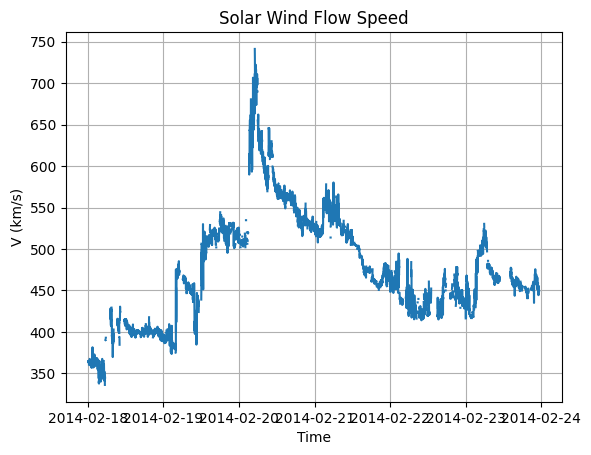

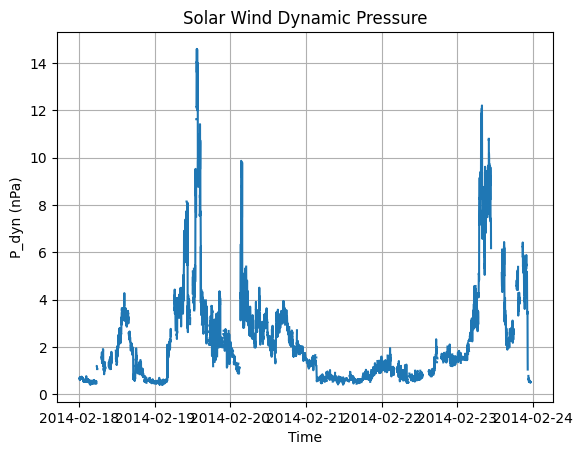

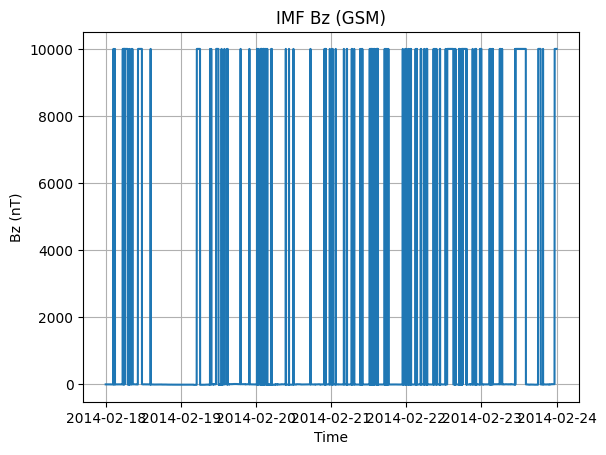

In [24]:
# 1) Ταχύτητα ηλιακού ανέμου V
plt.figure()
plt.plot(time, omni_filtered["V"])
plt.title("Solar Wind Flow Speed")
plt.xlabel("Time")
plt.ylabel("V (km/s)")
plt.grid(True)

# 2) Δυναμική πίεση Pdyn
plt.figure()
plt.plot(time, omni_filtered["Pdyn"])
plt.title("Solar Wind Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("P_dyn (nPa)")
plt.grid(True)

# 3) IMF Bz (GSM)
plt.figure()
plt.plot(time, omni_filtered["BzGSM"])
plt.title("IMF Bz (GSM)")
plt.xlabel("Time")
plt.ylabel("Bz (nT)")
plt.grid(True)

plt.show()

In [25]:
print(omni.head(10))
print(omni.tail(5))
print(omni.shape)


      Y DOY HR MN IMF_SC  Bmag  BzGSM        V       N          T   Pdyn
0  2014  49  0  0     71  4.78   0.82  99999.9  999.99  9999999.0  99.99
1  2014  49  0  1     71  4.78   0.78  99999.9  999.99  9999999.0  99.99
2  2014  49  0  2     71  4.70   0.74  99999.9  999.99  9999999.0  99.99
3  2014  49  0  3     71  4.75   0.47  99999.9  999.99  9999999.0  99.99
4  2014  49  0  4     71  4.70   0.04  99999.9  999.99  9999999.0  99.99
5  2014  49  0  5     71  4.65  -0.04    364.8    2.42    96013.0   0.64
6  2014  49  0  6     71  4.75  -0.21    364.8    2.42    96013.0   0.64
7  2014  49  0  7     71  4.71  -0.53    363.3    2.62   102151.0   0.69
8  2014  49  0  8     71  4.77  -0.67    364.1    2.50   108323.0   0.66
9  2014  49  0  9     71  4.74  -0.85    364.4    2.45   110589.0   0.65
         Y      DOY             HR    MN     IMF_SC        Bmag    BzGSM  \
8638  2014       54             23    58         99     9999.99  9999.99   
8639  2014       54             23    59     